In [226]:
import pandas as pd
import matplotlib.pyplot as plt

In [234]:
athletes= pd.read_csv('D:/DV_Term2/athlete_events.csv')

In [310]:
athletes.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


# Ques 1

In [236]:
most_popular_season= athletes.groupby(['Season', 'Year']).size().groupby(['Season']).size()

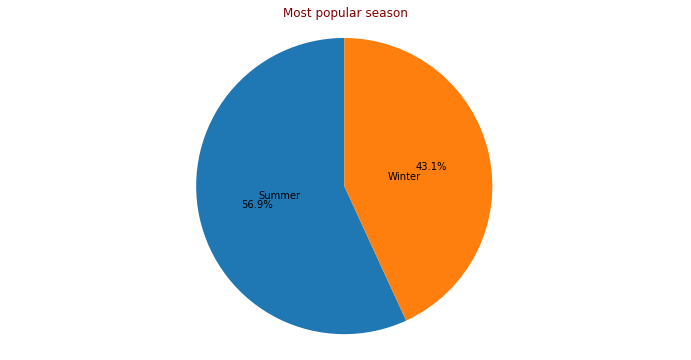

In [237]:
most_popular_season= pd.DataFrame(most_popular_season)
most_popular_season
most_popular_season= most_popular_season.rename(columns= {0:'Count'})
most_popular_season
labels= 'Summer', 'Winter'
f1g1= plt.figure(figsize=(12,6))
plt.pie(most_popular_season['Count'], autopct= '%1.1f%%', labels= labels, labeldistance= 0.3, startangle= 90)
plt.axis('equal')
plt.title('Most popular season', loc= 'center', color='maroon')
plt.show()


# difference between size and count.

In [240]:
import numpy as np
df = pd.DataFrame({'a':[0,0,1,2,2,2], 'b':[1,2,3,4,np.NaN,4], 'c':np.random.randn(6)})
df

,a,b,c
0,0,1.0,0.485962
1,0,2.0,-0.262739
2,1,3.0,0.403399
3,2,4.0,-0.619649
4,2,NaN,0.984788
5,2,4.0,0.682466


In [241]:
#the below query means that count dont consider na values where as size considers na values
print(df.groupby(['a'])['b'].count())
print(df.groupby(['a'])['b'].size())

a
0    2
1    1
2    2
Name: b, dtype: int64
a
0    2
1    1
2    3
Name: b, dtype: int64


# Ques 2

In [253]:
city_max_hosted= athletes.groupby(['City', 'Games']).size().groupby('City').size().sort_values().tail()

In [254]:
city_max_hosted= pd.DataFrame(city_max_hosted)
city_max_hosted= city_max_hosted.reset_index()

In [255]:
city_max_hosted= city_max_hosted.rename(columns= {0:'Count'})
city_max_hosted= city_max_hosted.sort_values(by= 'Count', ascending=False).head(5)

In [256]:
city_max_hosted

,City,Count
3,Athina,3
4,London,3
0,Innsbruck,2
1,Lake Placid,2
2,Los Angeles,2


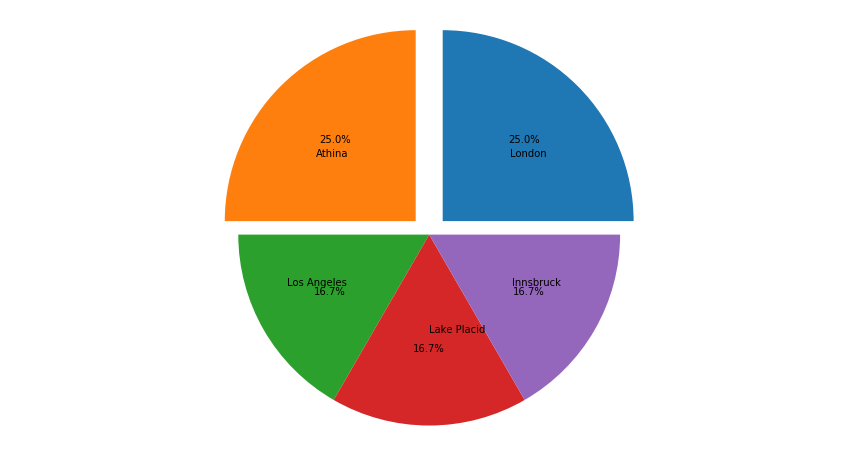

In [263]:
fig2= plt.figure(figsize= (15,8))
labels= 'London','Athina','Los Angeles','Lake Placid','Innsbruck'
explode= (0.1,0.1,0,0,0)
plt.pie(city_max_hosted['Count'], autopct='%0.1f%%', labels= labels, labeldistance= 0.5, explode= explode)
plt.axis('equal')
plt.show()

<function matplotlib.pyplot.show>

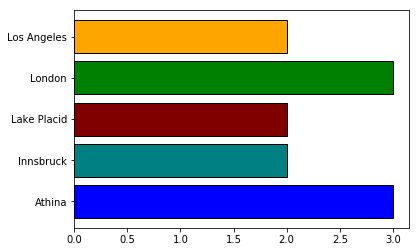

In [264]:
plt.barh(city_max_hosted['City'], city_max_hosted['Count'], edgecolor='black', color= ['blue', 'green', 'teal', 'maroon','orange'])
plt.show

# Ques 3

In [269]:
teams_with_most_athlete= athletes.groupby(['Team'])['Name'].nunique().sort_values().tail(10)

In [270]:
teams_with_most_athlete= pd.DataFrame(teams_with_most_athlete)
teams_with_most_athlete
teams_with_most_athlete= teams_with_most_athlete.reset_index()
teams_with_most_athlete= teams_with_most_athlete.rename(columns= {'Name': 'Athelete_Count'})
city_max_hosted= city_max_hosted.rename(columns= {0:'Count'})

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

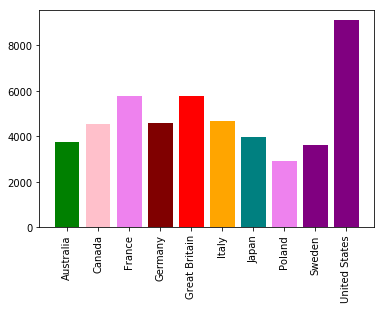

In [271]:
plt.bar(teams_with_most_athlete['Team'], teams_with_most_athlete['Athelete_Count'], color=['violet','purple', 'green', 'teal','pink', 'maroon','orange','red'])
plt.xticks(rotation= 'vertical')

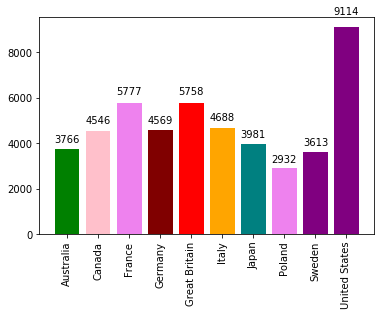

In [272]:
fig, ax = plt.subplots()
rects2= plt.bar(teams_with_most_athlete['Team'], teams_with_most_athlete['Athelete_Count'], color=['violet','purple', 'green', 'teal','pink', 'maroon','orange','red'])
autolabel(rects2)
plt.xticks(rotation='vertical')
plt.show()

# Ques 4

In [278]:
athletes1= athletes.dropna(subset=['Height'])
max_average_height= athletes1.groupby('Team')['Height'].mean().sort_values().tail(10)

In [279]:
#max_average_height
max_average_height= pd.DataFrame(max_average_height)
#max_average_height
max_average_height= max_average_height.reset_index()

In [280]:
max_average_height

,Team,Height
0,Salamander,187.666667
1,Puerto Rico-2,188.000000
2,New York Athletic Club-4,188.000000
3,Sydney Rowing Club,188.500000
4,Serbia-2,189.000000
5,Ireland-1,189.666667
6,Nadine,190.000000
7,France/Great Britain,191.000000
8,England-1,193.000000
9,Puerto Rico-1,196.000000


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text xticklabel objects>)

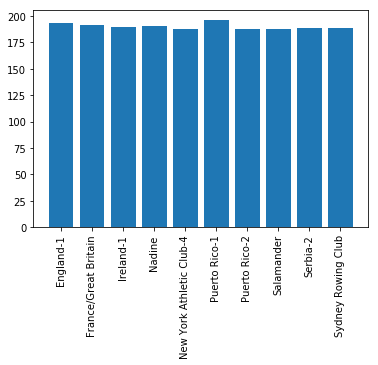

In [284]:
plt.bar(max_average_height['Team'], max_average_height['Height'])
plt.xticks(rotation='vertical')

In [285]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

#autolabel(rects1)

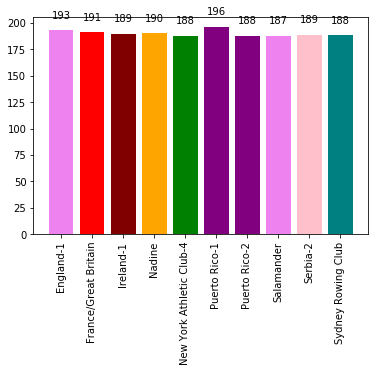

In [286]:
fig, ax = plt.subplots()
rects1= plt.bar(max_average_height['Team'], max_average_height['Height'], color=['violet','purple', 'green', 'teal','pink', 'maroon','orange','red'])
autolabel(rects1)
plt.xticks(rotation='vertical')
plt.show()


# Ques 5

In [287]:
athletes2= athletes.dropna(subset= ['Weight'])
max_avg_weight= athletes2.groupby(['Team']).agg({'Weight': 'mean'}).sort_values(by='Weight', ascending= False).head(10)

In [288]:
max_avg_weight= pd.DataFrame(max_avg_weight)
max_avg_weight= max_avg_weight.reset_index()

In [290]:
max_avg_weight

,Team,Weight
0,Kathleen,104.500000
1,Maryke,99.500000
2,London City Police-1,99.250000
3,Puerto Rico-2,98.000000
4,Ireland-1,97.666667
5,Puerto Rico-1,96.000000
6,Nauru,95.846154
7,Liverpool Police Team-2,95.375000
8,Libellule de Paris,95.000000
9,Mexico-2,95.000000


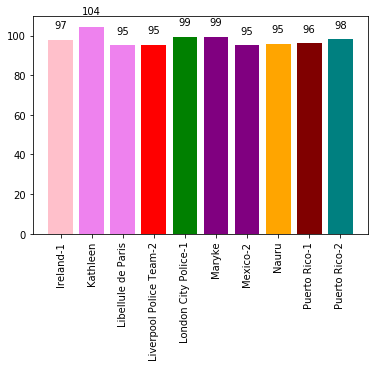

In [309]:
fig,ax = plt.subplots()
rects3= plt.bar(max_avg_weight['Team'], max_avg_weight['Weight'], color=['violet','purple', 'green', 'teal','pink', 'maroon','orange','red'])
autolabel(rects3)
plt.xticks(rotation='vertical')
plt.show()

# Ques 6

In [293]:
Top_10_Sports= athletes.groupby(['Sport']).size().sort_values().tail(10)

In [299]:
Top_10_Sports= pd.DataFrame(Top_10_Sports)
Top_10_Sports= Top_10_Sports.reset_index()


In [302]:
Top_10_Sports= Top_10_Sports.rename(columns= {0: 'Sports_count'})
Top_10_Sports

,Sport,Sports_count
0,Wrestling,7154
1,Alpine Skiing,8829
2,Cross Country Skiing,9133
3,Rowing,10595
4,Fencing,10735
5,Cycling,10859
6,Shooting,11448
7,Swimming,23195
8,Gymnastics,26707
9,Athletics,38624


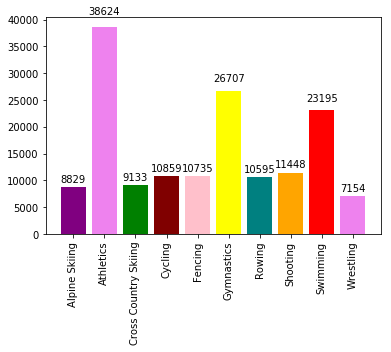

In [304]:
fig, ax = plt.subplots()
rects4= plt.bar(Top_10_Sports['Sport'], Top_10_Sports['Sports_count'], color=['violet','purple', 'green', 'teal','pink', 'maroon','orange','red', 'yellow'])
autolabel(rects4)
plt.xticks(rotation='vertical')
plt.show()

# Ques 7

In [315]:
max_golds= athletes[athletes['Medal']== 'Gold'].groupby(['Team']).size().sort_values().tail(10)

In [323]:
max_golds= pd.DataFrame(max_golds)
max_golds= max_golds.rename(columns= {0: 'Gold_count'})
max_golds= max_golds.reset_index()

In [324]:
max_golds

,Team,Gold_count
0,East Germany,369
1,Canada,422
2,Hungary,432
3,Sweden,451
4,France,455
5,Great Britain,519
6,Italy,535
7,Germany,679
8,Soviet Union,1058
9,United States,2474


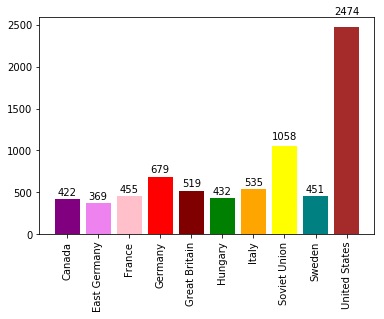

In [326]:
fig, ax = plt.subplots()
rects5= plt.bar(max_golds['Team'], max_golds['Gold_count'], color=['violet','purple', 'green', 'teal','pink', 'maroon','orange','red', 'yellow','brown'])
autolabel(rects5)
plt.xticks(rotation='vertical')
plt.show()

# Ques 8

In [327]:
max_silver = athletes[athletes['Medal']== 'Silver'].groupby(['Team']).size().sort_values().tail(10)

In [330]:
max_silver= pd.DataFrame(max_silver)
max_silver= max_silver.rename(columns= {0: 'silver_count'})
max_silver= max_silver.reset_index()

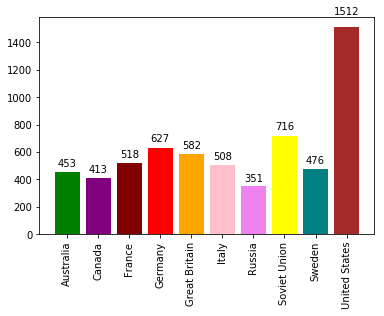

In [332]:
fig, ax = plt.subplots()
rects6= plt.bar(max_silver['Team'], max_silver['silver_count'], color=['violet','purple', 'green', 'teal','pink', 'maroon','orange','red', 'yellow','brown'])
autolabel(rects6)
plt.xticks(rotation='vertical')
plt.show()

# Ques 9

In [361]:
india_medals= athletes[athletes['Team']== 'India'].groupby(['Medal']).size().sort_values().tail(10)

In [365]:
india_medals= pd.DataFrame(india_medals)
india_medals= india_medals.rename(columns= {0: 'silver_count'})
india_medals= india_medals.reset_index()

In [366]:
india_medals

,index,Medal,silver_count
0,0,Silver,19
1,1,Bronze,40
2,2,Gold,138


([<matplotlib.patches.Wedge at 0x24b440a9518>,
 [Text(-0.328219,1.04989,'Silver'),
  Text(-1.04174,0.353237,'Bronze'),
  Text(0.969694,-0.70689,'Gold')],
 [Text(-0.179029,0.572668,'9.6%'),
  Text(-0.568222,0.192675,'20.3%'),
  Text(0.565655,-0.412352,'70.1%')])

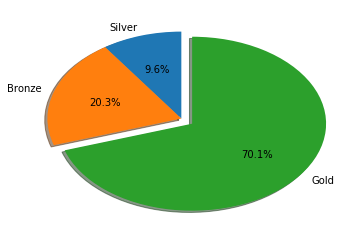

In [368]:
plt.pie(india_medals['silver_count'],autopct= '%0.1f%%', startangle= 90, explode= [0,0,0.1], shadow= True, labels= india_medals['Medal']) 